<a href="https://colab.research.google.com/github/biraj21/deep_learning_with_tf/blob/main/ch5/mnist_noise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), _ = mnist.load_data()
x_train = x_train.astype("float32").reshape(-1, 28 * 28) / 255

x_train_noise = np.concatenate(
    [x_train, np.random.random((len(x_train), 784))], axis=1
)
x_train_zeros = np.concatenate(
    [x_train, np.zeros((len(x_train), 784))], axis=1
)
x_train_ones = np.concatenate(
    [x_train, np.ones((len(x_train), 784))], axis=1
)

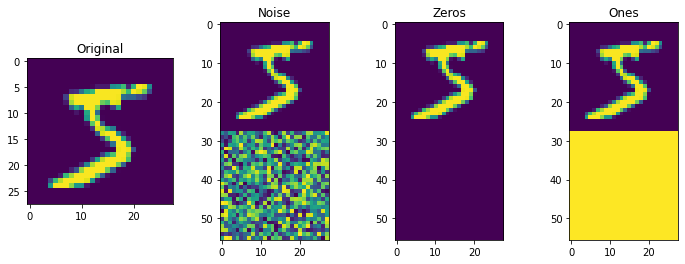

In [3]:
images = [
    (x_train[0].reshape((28, 28)), "Original"),
    (x_train_noise[0].reshape((56, 28)), "Noise"),
    (x_train_zeros[0].reshape((56, 28)), "Zeros"),
    (x_train_ones[0].reshape((56, 28)), "Ones"),
]

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(12,4))
for i, ax in enumerate(axs.flatten()):
    plt.sca(ax)
    plt.imshow(images[i][0])
    plt.title(images[i][1])

In [4]:
def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])

    model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [5]:
print("Training on original inputs...")
model = get_model()
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=0
)

print("Training on inputs with noise...")
model = get_model()
history_noise = model.fit(
    x_train_noise,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=0
)

print("Training on inputs with zeros...")
model = get_model()
history_zeros = model.fit(
    x_train_zeros,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=0
)

print("Training on inputs with ones...")
model = get_model()
history_ones = model.fit(
    x_train_ones,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
    verbose=0
)

Training on original inputs...
Training on inputs with noise...
Training on inputs with zeros...
Training on inputs with ones...


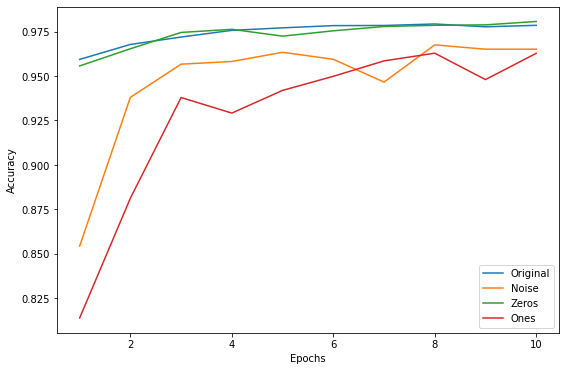

In [9]:
epochs = range(1, 11)

plt.figure(figsize=(9, 6))

plt.plot(epochs, history.history["val_accuracy"], label="Original")
plt.plot(epochs, history_noise.history["val_accuracy"], label="Noise")
plt.plot(epochs, history_zeros.history["val_accuracy"], label="Zeros")
plt.plot(epochs, history_ones.history["val_accuracy"], label="Ones")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend()

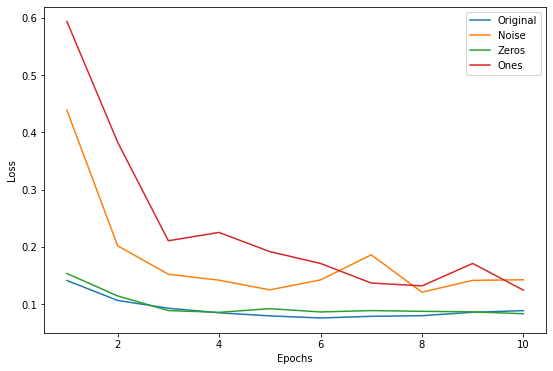

In [11]:
plt.figure(figsize=(9, 6))

plt.plot(epochs, history.history["val_loss"], label="Original")
plt.plot(epochs, history_noise.history["val_loss"], label="Noise")
plt.plot(epochs, history_zeros.history["val_loss"], label="Zeros")
plt.plot(epochs, history_ones.history["val_loss"], label="Ones")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()